In [1]:
import os
os.chdir('C:/Users/v-kirdwivedi/Documents/GitHub/MatchingAlgorithm/')

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from funcs import *
from multi_funcs import *

In [3]:
results = gs_f_simulate_nx(100, 10000, 25)
make_df_cycles(10000, 25)


TypeError: make_df_cycles() missing 1 required positional argument: 'results'

In [4]:
make_df_cycles(10000, 25, results)

,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,10000,25,1,7313,9946,0.735270
1,10000,25,1,7278,9942,0.732046
2,10000,25,1,7248,9947,0.728662
3,10000,25,1,7246,9948,0.728388
4,10000,25,1,7555,9943,0.759831
...,...,...,...,...,...,...
95,10000,25,1,7405,9963,0.743250
96,10000,25,1,7353,9952,0.738846
97,10000,25,1,7511,9950,0.754874
98,10000,25,1,7444,9946,0.748442


In [ ]:
for k in np.arange(10, 110, 10):
    for n in np.arange(100, 1100, 100):
        results = gs_f_simulate_nx(100, n, k)
        make_df_cycles(10000, k, results, save = True, path = 'data/simulations/small/')
        print('n = ' + str(n) + ', k = ' + str(k) + ' done.')

### Making Pretty Graphs

In [36]:
preferences = mdf_np(1000, 3)
x2 = preferences.copy()

In [37]:
matches, _ = run_gale_shapley(x2, k=3)

In [39]:
matches

,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,101,942,996,0,0,1,False,0.889813,0.615590,0.685207,False
1,78,85,85,1,1,1,False,0.235858,0.952992,0.952992,True
2,935,574,574,2,1,1,False,0.883750,0.906583,0.906583,False
3,337,596,596,3,1,1,False,0.524839,0.504763,0.504763,False
4,351,351,351,4,2,1,False,0.981418,0.981418,0.981418,False
...,...,...,...,...,...,...,...,...,...,...,...
845,597,597,597,995,2,1,False,0.633817,0.633817,0.633817,False
846,204,329,329,996,1,1,False,0.706148,0.965044,0.965044,True
847,530,530,530,997,2,1,False,0.489072,0.489072,0.489072,True
848,287,968,949,998,0,1,False,0.851198,0.845984,0.211102,False


In [40]:
edgelist = to_netword_df(preferences, matches, 3)

In [41]:
edgelist

,new_id_x,new_id_y
0,0,216
1,1,28
2,2,217
3,3,99
4,4,218
...,...,...
238,211,150
239,212,59
240,213,300
241,214,49


In [48]:
G= nx.from_pandas_edgelist(edgelist, source = 'new_id_x', target = 'new_id_y', create_using=nx.DiGraph())

In [49]:
nx.strongly_connected_components(G)

<generator object strongly_connected_components at 0x0000026B25484F20>

In [55]:
for cc in nx.strongly_connected_components(G):
    if len(cc)>1:
        print(cc)

{178, 142}


In [80]:
def get_strongly_connected_components(G):
    scc = []
    n_in_scc = 0
    n_scc = 0
    for cc in nx.strongly_connected_components(G):
        if len(cc)>1:
           scc.append(list(cc))
           n_in_scc += len(cc)
           n_scc += 1
    return scc, n_in_scc, n_scc
            

In [81]:
get_strongly_connected_components(G)

([[178, 142]], 2, 1)

In [56]:
find_cycles(preferences, matches, 3)

(     new_id_x  new_id_y
 0           0       216
 1           1        28
 2           2       217
 3           3        99
 4           4       218
 ..        ...       ...
 238       211       150
 239       212        59
 240       213       300
 241       214        49
 242       215       301
 
 [243 rows x 2 columns],
 1,
 [[178, 142]])

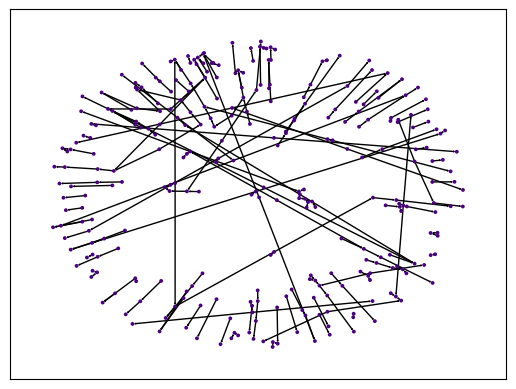

In [53]:
node_sizes = [3 for i in range(len(G))]
M = G.number_of_edges()
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrows=True,
    arrowstyle="->",
    arrowsize=1,
    edge_color='black',
    edge_cmap=cmap,
    width=1,
)
plt.show()